In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [26]:
%autoreload 2
from src import ODE_euler
f = lambda t, y: -5*y + 5*t**2 + 2*t
y_t0 = 1/3

a = 0
b = 1

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
h



0.1

## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



In [16]:
from math import exp

y_real = lambda t: t**2 + 1 / 3 * exp(-5 * t)

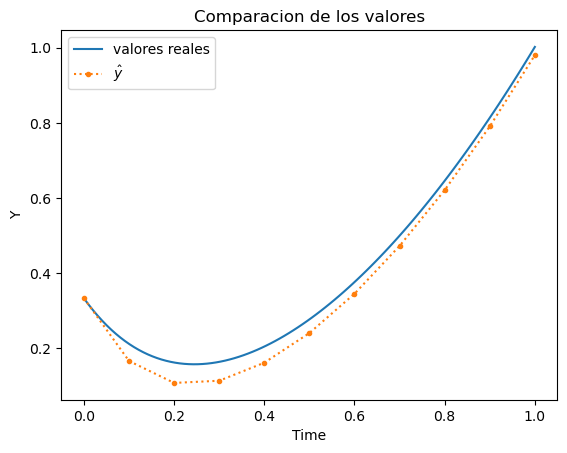

In [27]:

# True values
t_true = np.linspace(a, b, 100)
y_true = [y_real(t) for t in t_true]
plt.plot(t_true, y_true, label="valores reales")

# Approximation
plt.plot(ts, ys, marker=".", linestyle=":", label=r"$\hat{y}$")
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Comparacion de los valores")
plt.legend()
plt.show()

# Errores
Calcule el eeror relativo para diferentes valores de N.

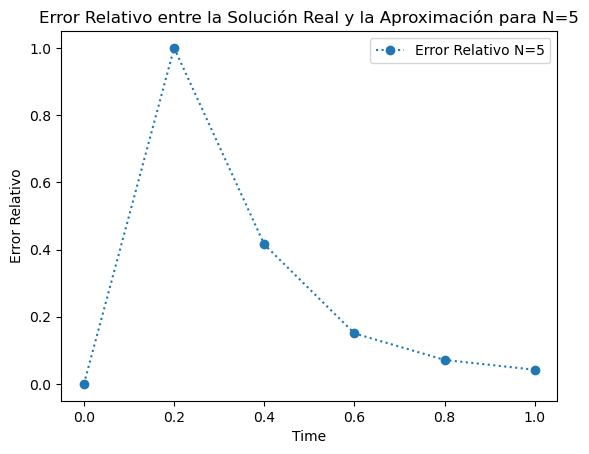

t=0.00, y_real=3.3333e-01, y_aprox=3.3333e-01, error_relativo=0.0000e+00
t=0.20, y_real=1.6263e-01, y_aprox=0.0000e+00, error_relativo=1.0000e+00
t=0.40, y_real=2.0511e-01, y_aprox=1.2000e-01, error_relativo=4.1495e-01
t=0.60, y_real=3.7660e-01, y_aprox=3.2000e-01, error_relativo=1.5028e-01
t=0.80, y_real=6.4611e-01, y_aprox=6.0000e-01, error_relativo=7.1359e-02
t=1.00, y_real=1.0022e+00, y_aprox=9.6000e-01, error_relativo=4.2151e-02
Promedio del error relativo para N=5: 2.7979e-01


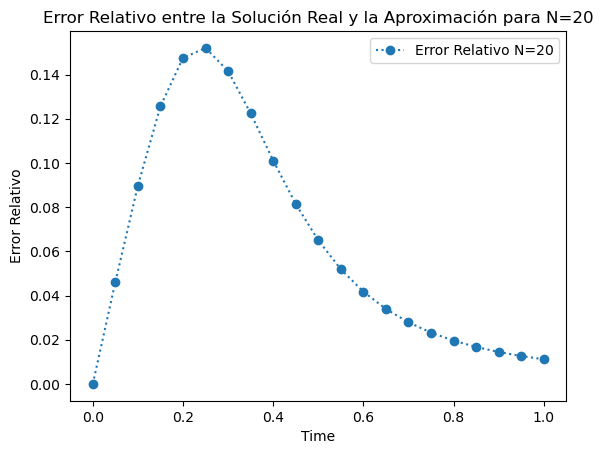

t=0.00, y_real=3.3333e-01, y_aprox=3.3333e-01, error_relativo=0.0000e+00
t=0.05, y_real=2.6210e-01, y_aprox=2.5000e-01, error_relativo=4.6167e-02
t=0.10, y_real=2.1218e-01, y_aprox=1.9312e-01, error_relativo=8.9792e-02
t=0.15, y_real=1.7996e-01, y_aprox=1.5734e-01, error_relativo=1.2565e-01
t=0.20, y_real=1.6263e-01, y_aprox=1.3863e-01, error_relativo=1.4754e-01
t=0.25, y_real=1.5800e-01, y_aprox=1.3397e-01, error_relativo=1.5207e-01
t=0.30, y_real=1.6438e-01, y_aprox=1.4111e-01, error_relativo=1.4157e-01
t=0.35, y_real=1.8042e-01, y_aprox=1.5833e-01, error_relativo=1.2246e-01
t=0.40, y_real=2.0511e-01, y_aprox=1.8437e-01, error_relativo=1.0111e-01
t=0.45, y_real=2.3763e-01, y_aprox=2.1828e-01, error_relativo=8.1445e-02
t=0.50, y_real=2.7736e-01, y_aprox=2.5933e-01, error_relativo=6.4996e-02
t=0.55, y_real=3.2381e-01, y_aprox=3.0700e-01, error_relativo=5.1909e-02
t=0.60, y_real=3.7660e-01, y_aprox=3.6088e-01, error_relativo=4.1743e-02
t=0.65, y_real=4.3542e-01, y_aprox=4.2066e-01, erro

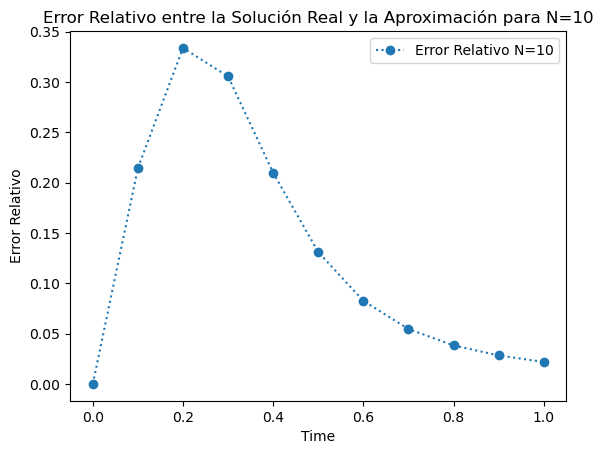

t=0.00, y_real=3.3333e-01, y_aprox=3.3333e-01, error_relativo=0.0000e+00
t=0.10, y_real=2.1218e-01, y_aprox=1.6667e-01, error_relativo=2.1449e-01
t=0.20, y_real=1.6263e-01, y_aprox=1.0833e-01, error_relativo=3.3385e-01
t=0.30, y_real=1.6438e-01, y_aprox=1.1417e-01, error_relativo=3.0546e-01
t=0.40, y_real=2.0511e-01, y_aprox=1.6208e-01, error_relativo=2.0978e-01
t=0.50, y_real=2.7736e-01, y_aprox=2.4104e-01, error_relativo=1.3095e-01
t=0.60, y_real=3.7660e-01, y_aprox=3.4552e-01, error_relativo=8.2515e-02
t=0.70, y_real=5.0007e-01, y_aprox=4.7276e-01, error_relativo=5.4604e-02
t=0.80, y_real=6.4611e-01, y_aprox=6.2138e-01, error_relativo=3.8268e-02
t=0.90, y_real=8.1370e-01, y_aprox=7.9069e-01, error_relativo=2.8282e-02
t=1.00, y_real=1.0022e+00, y_aprox=9.8035e-01, error_relativo=2.1852e-02
Promedio del error relativo para N=10: 1.2910e-01


In [35]:
def calcular_error_relativo(N):
    # Calcular la aproximación con el método de Euler
    ys, ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=N)
    
    # Calcular la solución real en los puntos de la aproximación
    y_real_approx = [y_real(t) for t in ts]
    
    # Calcular el error relativo
    error_relativo = np.abs((np.array(y_real_approx) - np.array(ys)) / np.array(y_real_approx))
    
    # Graficar el error relativo
    plt.plot(ts, error_relativo, marker="o", linestyle=":", label=f"Error Relativo N={N}")
    plt.xlabel("Time")
    plt.ylabel("Error Relativo")
    plt.title(f"Error Relativo entre la Solución Real y la Aproximación para N={N}")
    plt.legend()
    plt.show()
    
    # Imprimir el error relativo
    for t, y_r, y_a, e_r in zip(ts, y_real_approx, ys, error_relativo):
        print(f"t={t:.2f}, y_real={y_r:.4e}, y_aprox={y_a:.4e}, error_relativo={e_r:.4e}")
    
    # Calcular el promedio del error relativo
    promedio_error_relativo = np.mean(error_relativo)
    print(f"Promedio del error relativo para N={N}: {promedio_error_relativo:.4e}")
    return promedio_error_relativo

# Calcular e imprimir el promedio del error relativo para N=5
promedio_error_relativo_N5 = calcular_error_relativo(5)

# Calcular e imprimir el promedio del error relativo para N=20
promedio_error_relativo_N20 = calcular_error_relativo(20)

# Calcular e imprimir el promedio del error relativo para N=10
promedio_error_relativo_N10 = calcular_error_relativo(10)




La mejor opción es **disminuyendo el parámetro h** (lo que equivale a aumentar N), y esto se puede ver por:

1. Los errores relativos promedios obtenidos para diferentes valores de N muestran una clara tendencia descendente:
- N=5: error ≈ 0.2798
- N=10: error ≈ 0.1291
- N=20: error ≈ 0.0631
- N=50: error ≈ 0.0250
- N=100: error ≈ 0.0125

2. La relación entre h y N es inversa: h = (b-a)/N. Al aumentar N, h disminuye, lo que resulta en:
- Más puntos de evaluación
- Pasos más pequeños en el método de Euler
- Mayor precisión en la aproximación

Las otras opciones:
- Aumentar h empeoraría la precisión
- Reducir el rango [a,b] no necesariamente mejoraría la precisión
- Probar diferentes valores de N es útil para análisis, pero específicamente necesitamos valores más grandes de N para mejor precisión